# Data Science aplicado ao Serviço Militar - Análise Gráfica

### Objetivo do projeto

O objetivo do projeto é analisar os dados demográficos a respeito das pessoas que se alistam. 

### Conhecendo os dados

Os dados utilizados foram fornecidos através dos dados abertos do exército brasileiro : <a href='http://www.dados.gov.br/dataset/servico-militar/'> Serviço Militar </a>.

Como foi falado, o objetivo é prever as condições de operação de cada ponto de fornecimento de água, a partir de dados fornecidos. Os dados estão estruturados da seguinte forma:

### Coluna - Tipo - Descrição
* ANO_NASCIMENTO - inteiro - Ano de nascimento do cidadão
* PESO - inteiro - Peso em quilos do cidadão
* ALTURA - inteiro - Altura em centímetros do cidadão
* CABECA - inteiro - Tamanho da cabeça em centímetros do cidadão
* CALCADO - inteiro - Número do calçado do cidadão
* CINTURA - texto - Tamanho da cintura em centímetros do cidadão
* RELIGIAO - texto - Religião do cidadão
* MUN_NASCIMENTO - texto - Município de nascimento do cidadão
* UF_NASCIMENTO - texto - UF de nascimento do cidadão (KK - UF no exterior)
* PAIS_NASCIMENTO - texto - País de nascimento do cidadão
* ESTADO_CIVIL - texto - Estado civil (Solteiro, Casado, Desquitado, Divorciado, Viúvo, Separado Judicialmente, Outros) do cidadão
* SEXO - texto - Sexo ( M - Masculino, F - Feminino) do cidadão
* ESCOLARIDADE - texto - Escolaridade do cidadão
* VINCULACAO_ANO - inteiro - Ano de alistamento do cidadão
* DISPENSA - texto - Se o cidadão foi dispensado ou não (Sem dispensa, Com dispensa)
* ZONA_RESIDENCIAL - texto - Tipo de zona residencial (Rural, Urbana) do cidadão
* MUN_RESIDENCIA - texto - Município de residência do cidadão
* UF_RESIDENCIA - texto - UF de residência do cidadão (KK - UF no exterior)
* PAIS_RESIDENCIA - texto - País de residência do cidadão
* JSM - texto - Junta de Serviço Militar em que o cidadão realizou o alistamento
* MUN_JSM - texto - Município da Junta de Serviço Militar
* UF_JSM - texto - UF da Junta de Serviço Militar (KK - UF no exterior)

E o dicionário_series que faz a padronização quanto as séries dos inscritos possui os seguintes dados:
* Valores_errados - texto - Valores escritos de maneira errada
* Valores_certos - texto - Valores escritos de maneira correta de acordo com a lei X

# Tratando os dados

### Importando as bibliotecas

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np
import plotly.offline as py
import plotly.graph_objs as go

### Importando os dados

In [2]:
#Faz a ligação com o banco de dados do Google
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
%%time
#Importando o dataframe inicial atualizado
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Alistamento Militar/df_atualizado_utf8.csv", sep=",", encoding='UTF-8', low_memory=False)

CPU times: user 28.3 s, sys: 7.82 s, total: 36.1 s
Wall time: 1min 20s


### Inspecionando os dados

In [4]:
%%time
print("Informações do dataset:")
print(df.info())

print("Nomes das colunas:")
print(df.columns.values)

#Define a coluna indice como índice da tabela, permitindo assim a realização da busca usando a função df.loc
df=df.set_index('ÍNDICE')

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21365330 entries, 0 to 21365329
Data columns (total 12 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   ÍNDICE            int64 
 1   ANO_NASCIMENTO    int64 
 2   PAIS_NASCIMENTO   object
 3   ESTADO_CIVIL      object
 4   ESCOLARIDADE      object
 5   VINCULACAO_ANO    int64 
 6   DISPENSA          object
 7   ZONA_RESIDENCIAL  object
 8   MUN_RESIDENCIA    object
 9   UF_RESIDENCIA     object
 10  PAIS_RESIDENCIA   object
 11  IDADE             int64 
dtypes: int64(4), object(8)
memory usage: 1.9+ GB
None
Nomes das colunas:
['ÍNDICE' 'ANO_NASCIMENTO' 'PAIS_NASCIMENTO' 'ESTADO_CIVIL' 'ESCOLARIDADE'
 'VINCULACAO_ANO' 'DISPENSA' 'ZONA_RESIDENCIAL' 'MUN_RESIDENCIA'
 'UF_RESIDENCIA' 'PAIS_RESIDENCIA' 'IDADE']
CPU times: user 1.14 s, sys: 551 ms, total: 1.69 s
Wall time: 1.72 s


In [5]:
df.head()

,ANO_NASCIMENTO,PAIS_NASCIMENTO,ESTADO_CIVIL,ESCOLARIDADE,VINCULACAO_ANO,DISPENSA,ZONA_RESIDENCIAL,MUN_RESIDENCIA,UF_RESIDENCIA,PAIS_RESIDENCIA,IDADE
ÍNDICE,,,,,,,,,,,
0,1989,BRASIL,Solteiro,Ensino Médio Completo,2007,Sem dispensa,Urbana,PIRASSUNUNGA,SP,BRASIL,18
1,1989,BRASIL,Casado,Ensino Superior Completo,2007,Sem dispensa,Urbana,SAO PAULO,SP,BRASIL,18
2,1989,BRASIL,Solteiro,Ensino Médio Completo,2007,Sem dispensa,Urbana,CATANDUVA,SP,BRASIL,18
3,1989,BRASIL,Solteiro,Ensino Médio Completo,2007,Sem dispensa,Urbana,PIRAJUI,SP,BRASIL,18
4,1989,BRASIL,Solteiro,Ensino Médio Completo,2007,Sem dispensa,Urbana,PIRAJUI,SP,BRASIL,18


###Identificando dados nulos do dataframe

In [6]:
#Verificando as colunas com dados nulos

dados_nulos=df.isnull()

print("Dados nulos:")
print(dados_nulos.sum())

Dados nulos:
ANO_NASCIMENTO      0
PAIS_NASCIMENTO     0
ESTADO_CIVIL        0
ESCOLARIDADE        0
VINCULACAO_ANO      0
DISPENSA            0
ZONA_RESIDENCIAL    0
MUN_RESIDENCIA      0
UF_RESIDENCIA       0
PAIS_RESIDENCIA     0
IDADE               0
dtype: int64


### Tratamento das colunas

In [7]:
#As colunas com informações referentes a junta de serviço militar também serão dropadas pois não agregam informação relevante.
#As colunas peso, altura, cabeça e calçado possuem muitos dados faltantes(quase 79%), logo também serão dropadas.

#df = df.drop(['Unnamed: 0', 'PESO', 'ALTURA', 'CABECA', 'CALCADO', 'CINTURA', 'RELIGIAO', 'JSM', 'MUN_JSM', 'UF_JSM'], axis=1)


#Cria a coluna idade
df['IDADE']=0
df['IDADE']=df['VINCULACAO_ANO']-df['ANO_NASCIMENTO']
df['IDADE']

df.head()

,ANO_NASCIMENTO,PAIS_NASCIMENTO,ESTADO_CIVIL,ESCOLARIDADE,VINCULACAO_ANO,DISPENSA,ZONA_RESIDENCIAL,MUN_RESIDENCIA,UF_RESIDENCIA,PAIS_RESIDENCIA,IDADE
ÍNDICE,,,,,,,,,,,
0,1989,BRASIL,Solteiro,Ensino Médio Completo,2007,Sem dispensa,Urbana,PIRASSUNUNGA,SP,BRASIL,18
1,1989,BRASIL,Casado,Ensino Superior Completo,2007,Sem dispensa,Urbana,SAO PAULO,SP,BRASIL,18
2,1989,BRASIL,Solteiro,Ensino Médio Completo,2007,Sem dispensa,Urbana,CATANDUVA,SP,BRASIL,18
3,1989,BRASIL,Solteiro,Ensino Médio Completo,2007,Sem dispensa,Urbana,PIRAJUI,SP,BRASIL,18
4,1989,BRASIL,Solteiro,Ensino Médio Completo,2007,Sem dispensa,Urbana,PIRAJUI,SP,BRASIL,18


In [8]:
df['DISPENSA'].unique()

array(['Sem dispensa', 'Com dispensa', 'Não informado'], dtype=object)

# Análise Gráfica

## Analisa a quantidade de dispensas

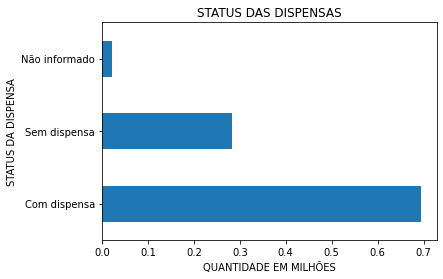

In [9]:
Analise_dispensa=df.filter(items=['DISPENSA','VINCULACAO_ANO']).sort_values(by='DISPENSA',ascending=False)
Analise_dispensa['DISPENSA'].value_counts(normalize=True).plot(kind="barh")

# Configura a legenda do eixo X
plt.xlabel('QUANTIDADE EM MILHÕES')

# Configura a legenda do eixo Y
plt.ylabel('STATUS DA DISPENSA')

# Título do gráfico
plt.title("STATUS DAS DISPENSAS")

#Mostra o gráfico
plt.show()
%matplotlib inline


## Analisa as idades

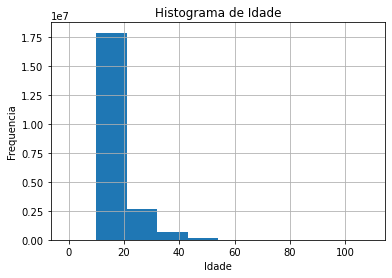

In [10]:
df.IDADE.hist()
plt.title('Histograma de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequencia')

#Mostra o gráfico
plt.show()
%matplotlib inline


## Analisa a relação entre a dispensa e a escolaridade

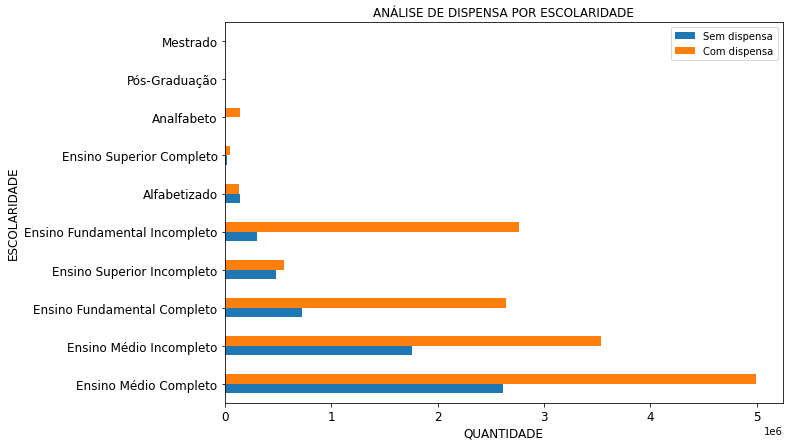

In [11]:
#Criando o dataframe dados com 2 colunas, sem dispensa e com dispensa
dados=pd.DataFrame()
dados['Sem dispensa']=0
dados['Com dispensa']=0

dados['Sem dispensa']=df['ESCOLARIDADE'].where(df.DISPENSA=='Sem dispensa').value_counts().sort_values(ascending=False).head(10)
dados['Com dispensa']=df['ESCOLARIDADE'].where(df.DISPENSA=='Com dispensa').value_counts().sort_values(ascending=False).head(10)

ax = dados[['Sem dispensa','Com dispensa']].plot(kind='barh', title ="ANÁLISE DE DISPENSA POR ESCOLARIDADE", figsize=(10, 7), legend=True, fontsize=12)
ax.set_xlabel("QUANTIDADE", fontsize=12)
ax.set_ylabel("ESCOLARIDADE", fontsize=12)
plt.show()

### Verificando os valores da coluna estado cívil

In [12]:
pd.unique(df['ESTADO_CIVIL']).tolist()

['Solteiro',
 'Casado',
 'Divorciado',
 'Outros',
 'Desquitado',
 'Viúvo',
 'Separado Judicialmente']

### Os termos 'Desquitado' e 'Separado Judicialmente', serão substituidos por 'divorciado'

### Corrigindo valores da coluna estado civil

In [13]:
df['ESTADO_CIVIL']=df['ESTADO_CIVIL'].replace('Desquitado', 'Divorciado')
df['ESTADO_CIVIL']=df['ESTADO_CIVIL'].replace('Separado Judicialmente', 'Divorciado')
df['ESTADO_CIVIL']=df['ESTADO_CIVIL'].replace('Viuvo', 'Viúvo')

## Analise da relação entre a dispensa e o estado cívil

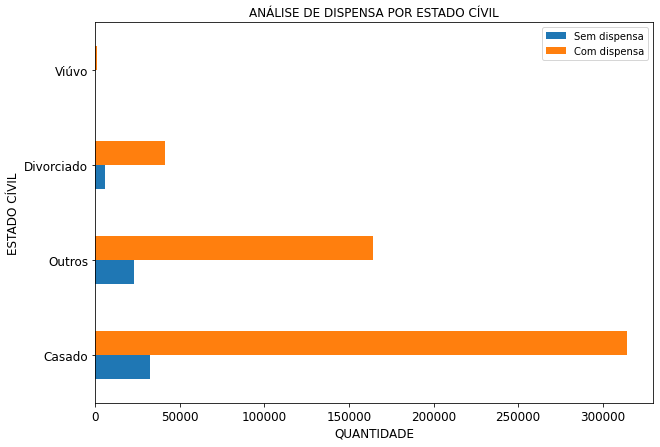

In [14]:
#Cria um dataframe para armazenar os dados relativos a dispensa e o estado cívil
dados=pd.DataFrame()
dados['Sem dispensa']=0
dados['Com dispensa']=0

dados['Sem dispensa']=df['ESTADO_CIVIL'].where(Analise_dispensa.DISPENSA=='Sem dispensa').value_counts().sort_values(ascending=False).head(10)
dados['Com dispensa']=df['ESTADO_CIVIL'].where(Analise_dispensa.DISPENSA=='Com dispensa').value_counts().sort_values(ascending=False).head(10)

dados=dados[dados['Sem dispensa']!=6000794]

ax = dados[['Sem dispensa','Com dispensa']].plot(kind='barh', title ="ANÁLISE DE DISPENSA POR ESTADO CÍVIL", figsize=(10, 7), legend=True, fontsize=12)
ax.set_xlabel("QUANTIDADE", fontsize=12)
ax.set_ylabel("ESTADO CÍVIL", fontsize=12)
plt.show()

## Analise da relação entre a dispensa e o pais de nascimento

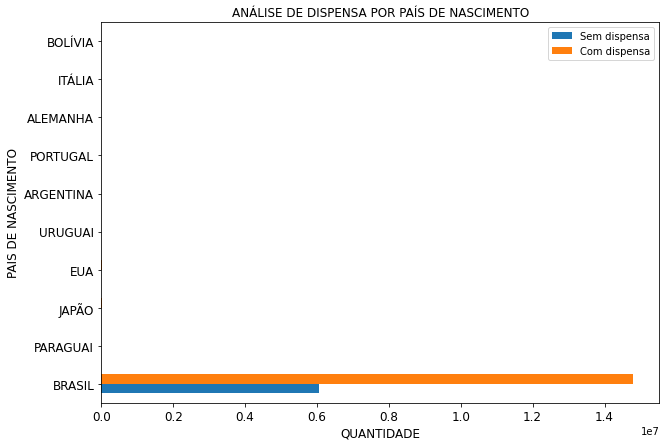

In [15]:
#Cria um dataframe para armazenar os dados relativos a dispensa e o pais de nascimento
dados=pd.DataFrame()
dados['Sem dispensa']=0
dados['Com dispensa']=0

dados['Sem dispensa']=df['PAIS_NASCIMENTO'].where(Analise_dispensa.DISPENSA=='Sem dispensa').value_counts().sort_values(ascending=False).head(10)
dados['Com dispensa']=df['PAIS_NASCIMENTO'].where(Analise_dispensa.DISPENSA=='Com dispensa').value_counts().sort_values(ascending=False).head(10)

ax = dados[['Sem dispensa','Com dispensa']].plot(kind='barh', title ="ANÁLISE DE DISPENSA POR PAÍS DE NASCIMENTO", figsize=(10, 7), legend=True, fontsize=12)
ax.set_xlabel("QUANTIDADE", fontsize=12)
ax.set_ylabel("PAIS DE NASCIMENTO", fontsize=12)
plt.show()

## Analise da a relação entre a dispensa e o pais de nascimento desconsiderando o Brasil

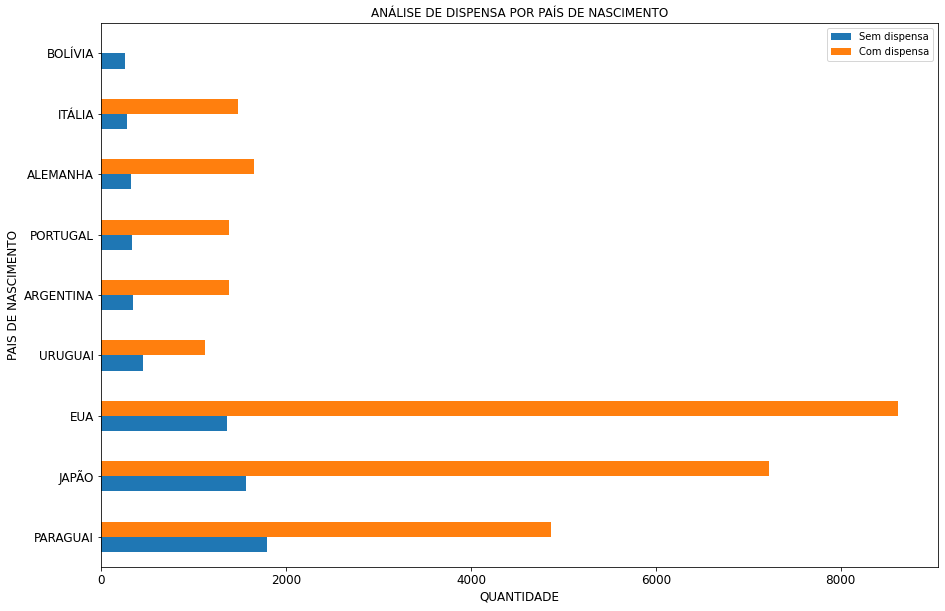

In [16]:
dados=dados[dados['Sem dispensa']!=6051996]

ax = dados[['Sem dispensa','Com dispensa']].plot(kind='barh', title ="ANÁLISE DE DISPENSA POR PAÍS DE NASCIMENTO", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("QUANTIDADE", fontsize=12)
ax.set_ylabel("PAIS DE NASCIMENTO", fontsize=12)
plt.show()

## Analise da relação entre a dispensa e o estado em que o cidadão vive

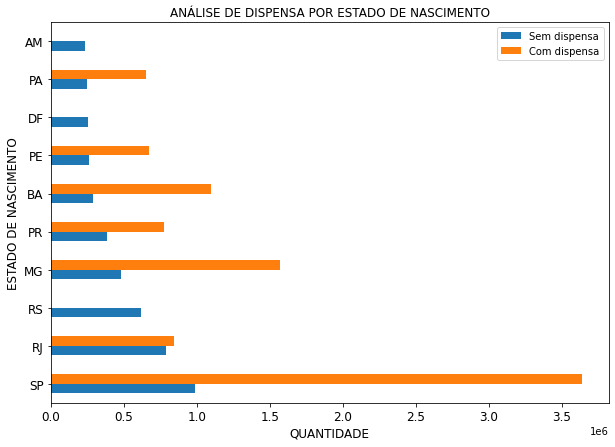

In [17]:
#Cria um dataframe para armazenar os dados relativos a dispensa e o estado em que vive
dados=pd.DataFrame()
dados['Sem dispensa']=0
dados['Com dispensa']=0

dados['Sem dispensa']=df['UF_RESIDENCIA'].where(Analise_dispensa.DISPENSA=='Sem dispensa').value_counts().sort_values(ascending=False).head(10)
dados['Com dispensa']=df['UF_RESIDENCIA'].where(Analise_dispensa.DISPENSA=='Com dispensa').value_counts().sort_values(ascending=False).head(10)

ax = dados[['Sem dispensa','Com dispensa']].plot(kind='barh', title ="ANÁLISE DE DISPENSA POR ESTADO DE NASCIMENTO", figsize=(10, 7), legend=True, fontsize=12)
ax.set_xlabel("QUANTIDADE", fontsize=12)
ax.set_ylabel("ESTADO DE NASCIMENTO", fontsize=12)
plt.show()

## Analise da relação entre a dispensa e o município em que o cidadão vive

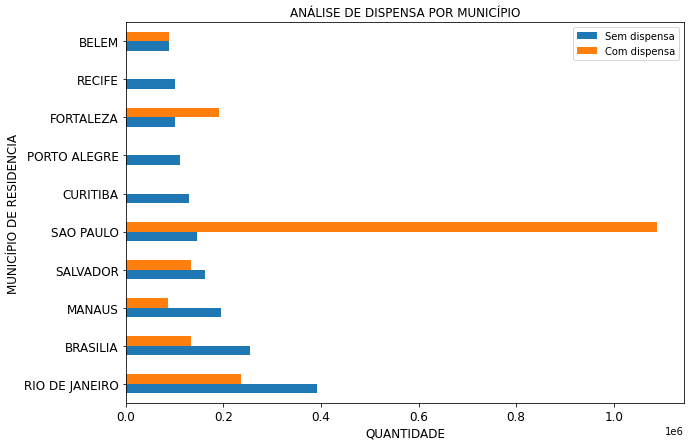

In [18]:
#Cria um dataframe para armazenar os dados relativos a dispensa e o estado em que vive
dados=pd.DataFrame()
dados['Sem dispensa']=0
dados['Com dispensa']=0

dados['Sem dispensa']=df['MUN_RESIDENCIA'].where(Analise_dispensa.DISPENSA=='Sem dispensa').value_counts().sort_values(ascending=False).head(10)
dados['Com dispensa']=df['MUN_RESIDENCIA'].where(Analise_dispensa.DISPENSA=='Com dispensa').value_counts().sort_values(ascending=False).head(10)

ax = dados[['Sem dispensa','Com dispensa']].plot(kind='barh', title ="ANÁLISE DE DISPENSA POR MUNICÍPIO", figsize=(10, 7), legend=True, fontsize=12)
ax.set_xlabel("QUANTIDADE", fontsize=12)
ax.set_ylabel("MUNICÍPIO DE RESIDENCIA", fontsize=12)
plt.show()

## Analise da relação entre a dispensa e a zona residencial em que o cidadão vive

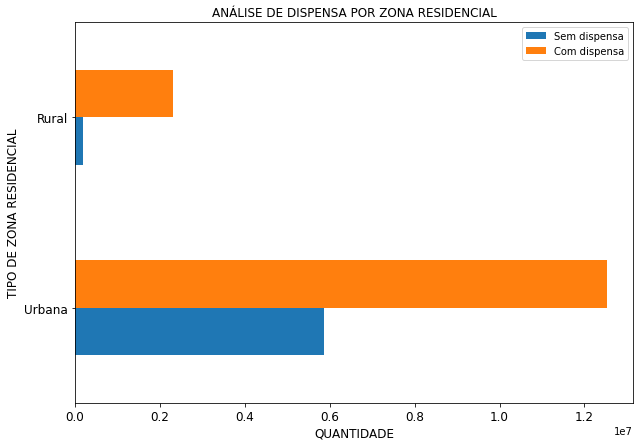

In [19]:
#Cria um dataframe para armazenar os dados relativos a dispensa e o estado em que vive
dados=pd.DataFrame()
dados['Sem dispensa']=0
dados['Com dispensa']=0

dados['Sem dispensa']=df['ZONA_RESIDENCIAL'].where(Analise_dispensa.DISPENSA=='Sem dispensa').value_counts().sort_values(ascending=False).head(10)
dados['Com dispensa']=df['ZONA_RESIDENCIAL'].where(Analise_dispensa.DISPENSA=='Com dispensa').value_counts().sort_values(ascending=False).head(10)

ax = dados[['Sem dispensa','Com dispensa']].plot(kind='barh', title ="ANÁLISE DE DISPENSA POR ZONA RESIDENCIAL", figsize=(10, 7), legend=True, fontsize=12)
ax.set_xlabel("QUANTIDADE", fontsize=12)
ax.set_ylabel("TIPO DE ZONA RESIDENCIAL", fontsize=12)
plt.show()

## Analise da variação das dispensas ao longo dos anos

In [20]:
#Gráfico de barras

trace1 = go.Bar(x = ['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'],
                y = df['VINCULACAO_ANO'].where(df.DISPENSA=='Sem dispensa').value_counts().sort_values(ascending=False),
                name = 'Sem dispensa',
                marker = {'color': '#ee5253'})


trace2 = go.Bar(x = ['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'],
                y = df['VINCULACAO_ANO'].where(df.DISPENSA=='Com dispensa').value_counts().sort_values(ascending=False),
                name = 'Com dispensa',
                marker = {'color': '#341f97'})
data = [trace1, trace2]

# Criando Layout
layout = go.Layout(title='STATUS DAS DISPENSAS DO ANO 2007 AO ANO 2019',
                   yaxis={'title':'QUANTIDADE'},
                   xaxis={'title': 'ANO '})

py.iplot(data)

In [21]:
#Gráfico de linhas

trace1 = go.Scatter(x = ['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'],
                y = df['VINCULACAO_ANO'].where(df.DISPENSA=='Sem dispensa').value_counts().sort_values(ascending=False),
                mode = 'markers+lines',
                name = 'Sem dispensa',
                marker = {'color': '#ee5253'})


trace2 = go.Scatter(x = ['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'],
                y = df['VINCULACAO_ANO'].where(df.DISPENSA=='Com dispensa').value_counts().sort_values(ascending=False),
                mode = 'markers+lines',
                name = 'Com dispensa',
                marker = {'color': '#341f97'})


data = [trace1, trace2]

# Criando Layout
layout = go.Layout(title='STATUS DAS DISPENSAS DO ANO 2007 AO ANO 2019',
                   yaxis={'title':'QUANTIDADE'},
                   xaxis={'title': 'ANO '})


# Criando figura que será exibida
fig = go.Figure(data=data, layout=layout)

py.iplot(data)